In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
#import pickle
#import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import csv
import re

%matplotlib inline

In [2]:
datapath = "../data/"
outputs = "../outputs/"

# links
* https://darksky.net/dev/docs
* https://github.com/bitpixdigital/forecastiopy3

# Exploring metadata

In [32]:
df_montevideo = pd.read_csv(os.path.join(datapath,'{}-weather.csv'.format("montevideo")))
df_miraflores = pd.read_csv(os.path.join(datapath,'{}-weather.csv'.format("miraflores")))
df_rj = pd.read_csv(os.path.join(datapath,'{}-weather.csv'.format("rio_de_janeiro")))

In [33]:
dfs_dict = {}
dfs_dict = {"montevideo": df_montevideo, "miraflores": df_miraflores, "rio de janeiro": df_rj}

In [34]:
df_miraflores.head()

,time,cloudCover,humidity,precipIntensity,windSpeed
0,2018-10-01 00:00:00,0.16,0.69,0.0,2.89
1,2018-10-01 01:00:00,0.14,0.70,0.0,2.90
2,2018-10-01 02:00:00,0.15,0.72,0.0,2.95
3,2018-10-01 03:00:00,0.20,0.75,0.0,3.04
4,2018-10-01 04:00:00,0.41,0.76,0.0,3.14


In [35]:
df_miraflores.tail()

,time,cloudCover,humidity,precipIntensity,windSpeed
7893,2019-08-25 21:00:00,0.42,0.67,0.0000,2.64
7894,2019-08-25 22:00:00,0.44,0.69,0.0000,2.21
7895,2019-08-25 23:00:00,0.47,0.69,0.0000,2.59
7896,2019-08-26 00:00:00,0.49,0.70,0.0000,2.87
7897,2019-08-26 01:00:00,0.51,0.71,0.0073,2.89


In [36]:
df_montevideo.head()

,time,cloudCover,humidity,precipIntensity,windSpeed
0,2018-10-01 00:00:00,0.19,0.84,1.7011,9.21
1,2018-10-01 01:00:00,0.19,0.85,1.4210,12.79
2,2018-10-01 02:00:00,0.19,0.85,0.8661,11.32
3,2018-10-01 03:00:00,0.19,0.85,0.5212,9.19
4,2018-10-01 04:00:00,0.19,0.80,0.3871,7.12


In [37]:
df_miraflores.tail()

,time,cloudCover,humidity,precipIntensity,windSpeed
7893,2019-08-25 21:00:00,0.42,0.67,0.0000,2.64
7894,2019-08-25 22:00:00,0.44,0.69,0.0000,2.21
7895,2019-08-25 23:00:00,0.47,0.69,0.0000,2.59
7896,2019-08-26 00:00:00,0.49,0.70,0.0000,2.87
7897,2019-08-26 01:00:00,0.51,0.71,0.0073,2.89


In [38]:
df_rj.head()

,time,cloudCover,humidity,precipIntensity,windSpeed
0,2018-10-01 00:00:00,1.0,0.873333,0.191667,2.026667
1,2018-10-01 01:00:00,1.0,0.873333,0.187300,2.016667
2,2018-10-01 02:00:00,1.0,0.903333,0.179167,1.736667
3,2018-10-01 03:00:00,1.0,0.896667,0.182800,1.876667
4,2018-10-01 04:00:00,1.0,0.890000,0.153433,2.550000


In [39]:
df_rj.tail()

,time,cloudCover,humidity,precipIntensity,windSpeed
7832,2019-08-23 08:00:00,0.750000,0.790000,0.010733,2.260000
7833,2019-08-23 09:00:00,0.886667,0.750000,0.110700,2.460000
7834,2019-08-23 10:00:00,0.886667,0.723333,0.113567,2.136667
7835,2019-08-23 11:00:00,0.906667,0.700000,0.095133,2.510000
7836,2019-08-23 12:00:00,0.906667,0.676667,0.087667,2.376667


In [40]:
print("INFO:\n")
for name,df in dfs_dict.items():
    print(name.upper(), '\n')
    print(df.info(), '\n')

INFO:

MONTEVIDEO 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 5 columns):
time               7920 non-null object
cloudCover         7920 non-null float64
humidity           7920 non-null float64
precipIntensity    7920 non-null float64
windSpeed          7920 non-null float64
dtypes: float64(4), object(1)
memory usage: 309.5+ KB
None 

MIRAFLORES 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7898 entries, 0 to 7897
Data columns (total 5 columns):
time               7898 non-null object
cloudCover         7898 non-null float64
humidity           7898 non-null float64
precipIntensity    7898 non-null float64
windSpeed          7898 non-null float64
dtypes: float64(4), object(1)
memory usage: 308.6+ KB
None 

RIO DE JANEIRO 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7837 entries, 0 to 7836
Data columns (total 5 columns):
time               7837 non-null object
cloudCover         7837 non-null float64
humidity           78

In [41]:
print("DESCRIPTION:\n")
for name,df in dfs_dict.items():
    print(name.upper(), '\n')
    print(df.describe(), '\n')

DESCRIPTION:

MONTEVIDEO 

        cloudCover     humidity  precipIntensity    windSpeed
count  7920.000000  7920.000000      7920.000000  7920.000000
mean      0.545125     0.711049         0.131262     4.545037
std       0.367136     0.146353         0.583653     2.398386
min       0.000000     0.250000         0.000000     0.000000
25%       0.190000     0.600000         0.000000     2.860000
50%       0.600000     0.710000         0.000000     4.340000
75%       0.880000     0.830000         0.018200     6.180000
max       1.000000     1.000000        19.476100    13.440000 

MIRAFLORES 

        cloudCover     humidity  precipIntensity    windSpeed
count  7898.000000  7898.000000      7898.000000  7898.000000
mean      0.714961     0.720204         0.003185     2.783377
std       0.292377     0.063202         0.009574     0.772309
min       0.000000     0.540000         0.000000     0.640000
25%       0.500000     0.670000         0.000000     2.260000
50%       0.810000     0.720

In [42]:
print("VARIABLE CATEGORIES:")
for name,df in dfs_dict.items():
    print('\n', name.upper(), sep='')
    for cat in df.columns:
        print("Number of levels in category '{0}': \b {1:2.2f} ".format(cat, df_miraflores[cat].unique().size))

VARIABLE CATEGORIES:

MONTEVIDEO
Number of levels in category 'time':  7897.00 
Number of levels in category 'cloudCover':  101.00 
Number of levels in category 'humidity':  33.00 
Number of levels in category 'precipIntensity':  331.00 
Number of levels in category 'windSpeed':  428.00 

MIRAFLORES
Number of levels in category 'time':  7897.00 
Number of levels in category 'cloudCover':  101.00 
Number of levels in category 'humidity':  33.00 
Number of levels in category 'precipIntensity':  331.00 
Number of levels in category 'windSpeed':  428.00 

RIO DE JANEIRO
Number of levels in category 'time':  7897.00 
Number of levels in category 'cloudCover':  101.00 
Number of levels in category 'humidity':  33.00 
Number of levels in category 'precipIntensity':  331.00 
Number of levels in category 'windSpeed':  428.00 


# visualization
Wind Speed and Precipitation Intensity

In [43]:
df_rj

,time,cloudCover,humidity,precipIntensity,windSpeed
0,2018-10-01 00:00:00,1.000000,0.873333,0.191667,2.026667
1,2018-10-01 01:00:00,1.000000,0.873333,0.187300,2.016667
2,2018-10-01 02:00:00,1.000000,0.903333,0.179167,1.736667
3,2018-10-01 03:00:00,1.000000,0.896667,0.182800,1.876667
4,2018-10-01 04:00:00,1.000000,0.890000,0.153433,2.550000
5,2018-10-01 05:00:00,1.000000,0.890000,0.116233,2.833333
6,2018-10-01 06:00:00,1.000000,0.866667,0.079567,2.083333
7,2018-10-01 07:00:00,0.750000,0.803333,0.037833,1.653333
8,2018-10-01 08:00:00,0.750000,0.786667,0.009133,1.470000
9,2018-10-01 09:00:00,0.703333,0.713333,0.000000,1.456667


In [44]:
df_rj.Speed.plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Speed'

## Big picture of a 1 year timeframe
All cities

In [45]:
hour_of_day = 12+1

prec_dict = {}
wind_dict = {}
time_list = []
for loc in ["miraflores", "montevideo", "rio_de_janeiro"]:
    file_name = os.path.join(datapath,'{}-daily_weather.csv'.format(loc))
    csv_reader = csv.reader(open(file_name, mode='r'))
    
    prec_list = []
    wind_list = []
    day_count = 0
    for row in csv_reader:
        if day_count == 0: 
            day_count += 1
            continue
        prec_list.append(float(row[3]))
        wind_list.append(float(row[4]))
        
        if loc == "miraflores":
            date = day_count #int(row[0][8:10])
            date = datetime.strptime(row[0][:10], "%Y-%m-%d").date()
            time_list.append(date)
        day_count += 1
            
    prec_dict[loc] = prec_list
    wind_dict[loc] = wind_list
prec_dict['datetime'] = time_list

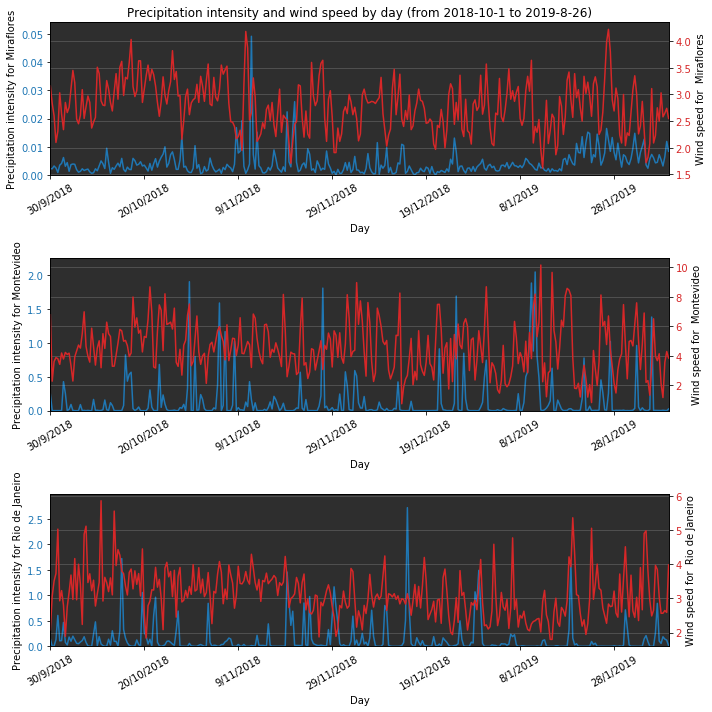

In [46]:
X = range(len(prec_dict['datetime']))
X_labels = ['{}/{}/{}'.format(i.day, i.month, i.year)  for i in prec_dict['datetime']]

legend = ['Miraflores', 'Montevideo', 'Rio_de_Janeiro']

axes2 = []
fig, (ax1a, ax1b, ax1c) = plt.subplots(3,figsize=(10,10))
axes1 = [ax1a, ax1b, ax1c]

count = 0
for city in legend:
    y = prec_dict[city.lower()] #city.lower()
    city_clean = re.sub('_', ' ', city)
    color = 'tab:blue'
    title = 'Precipitation intensity and wind speed by day (from 2018-10-1 to 2019-8-26)'
    axes1[0].set_title(title)
    axes1[count].set_xlabel('Day')
    axes1[count].set_ylabel('Precipitation intensity for {}'.format(city_clean))
    axes1[count].tick_params(axis='y', labelcolor=color)
    axes1[count].set_ylim([0, max(y)*1.1])
    axes1[count].set_xlim([0, max(X)])
    axes1[count].set_facecolor("#2E2E2E")
    axes1[count].plot(X, y, color)
    
    axes1[count].set_xticklabels([X_labels[i] for i in X if i%20==0], rotation=30)
    
    y = wind_dict[city.lower()]
    color = 'tab:red'
    ax_right = axes1[count].twinx()
    axes2.append(ax_right)
    axes2[count].set_ylabel('Wind speed for  {}'.format(city_clean))
    axes2[count].plot(X, y, color)
    axes2[count].tick_params(axis='y', labelcolor=color)
    
    plt.grid(True, color="white", alpha=0.2)
    
    fig.tight_layout()
    count += 1
file = os.path.join(outputs,'weather.png')
plt.savefig(file)

### worst day or quantile

In [795]:
def get_quantile_or_worst(city, quantile=True, QUANTILE=0.8):
    file_name = os.path.join(datapath,'{}-daily_weather.csv'.format(city))
    csv_reader = csv.reader(open(file_name, mode='r'))
    
    prec_list = []
    count = -1
    for row in csv_reader:
        count +=1
        if count == 0: continue
        prec_list.append(float(row[3]))
    temp_sorted = prec_list[:]
    temp_sorted.sort()
    print(max(prec_list))
    if quantile == True:
        print(prec_dict['datetime'][prec_list.index(temp_sorted[int(QUANTILE*len(temp_sorted))])+1])
    if quantile == False: #get worst day
        print(prec_dict['datetime'][prec_list.index(max(prec_list))+1])

Get data. If you want the worst day, simply type quantile = False. Else, use the format below
```python
get_quantile_or_worst("rio_de_janeiro", quantile=True, QUANTILE=0.8)
```

In [796]:
get_quantile_or_worst("rio_de_janeiro", quantile=False)

2.7219333333333338
2019-04-09


In [797]:
get_quantile_or_worst("montevideo", quantile=False)

2.0475
2019-06-16


In [798]:
get_quantile_or_worst("miraflores", quantile=False)

0.0492
2019-01-16


In [620]:
prec_list.index(max(prec_list))

190

### get hourly data from worst day

In [ ]:
prec_dict = {}
wind_dict = {}
time_list = []

loc = "miraflores"
file_name = os.path.join(datapath,'{}-weather.csv'.format(loc))
csv_reader = csv.reader(open(file_name, mode='r'))

prec_list = []
wind_list = []
#count = -1
day_count = 0
for row in csv_reader:
    #count +=1
    if day_count == 257: print('done')
    if day_count == 0: 
        day_count += 1
        continue
    prec_list.append(float(row[3]))
    wind_list.append(float(row[4]))
    
    if loc == "miraflores":
        date = day_count #int(row[0][8:10])
        time_list.append(date)
    day_count += 1/24
        
prec_dict[loc] = prec_list
wind_dict[loc] = wind_list

prec_dict['datetime'] = time_list